In [67]:
import pandas as pd 
import numpy as np 

import warnings
warnings.filterwarnings('ignore')

In [68]:
titanic = pd.read_csv('titanic.csv')

In [69]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [71]:
titanic['Age']= titanic['Age'].fillna(titanic['Age'].mean())

In [72]:
titanic.Age

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [73]:
titanic['Embarked']= titanic['Embarked'].fillna('S')

In [74]:
# All imp variables 

In [75]:
titanic_df = titanic[['Survived', 'Pclass',  'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']]

In [76]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [77]:
titanic_df= pd.get_dummies(titanic_df,drop_first=True)

In [78]:
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [79]:
X = titanic_df[['Pclass','Age','SibSp','Parch','Fare','Sex_male','Embarked_Q','Embarked_S']]

y = titanic_df[['Survived']]

In [80]:
# Splitting the dataset in train and test 

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state=12)


In [81]:
# Feature Scaling 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[['Age','Fare']] = sc.fit_transform(X_train[['Age','Fare']])
X_test[['Age','Fare']] = sc.transform(X_test[['Age','Fare']]) 

In [82]:
# Fitting the Logistic Regression Model 

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train , y_train )

LogisticRegression()

In [83]:
y_pred = classifier.predict(X_test)

In [84]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1])

In [85]:
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score , recall_score

acc = accuracy_score(y_pred , y_test)
cf  = confusion_matrix(y_pred , y_test)
precision  = precision_score(y_pred , y_test)
recall  = recall_score(y_pred , y_test)

<AxesSubplot: >

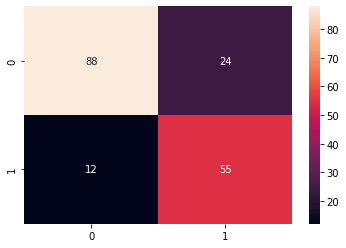

In [86]:

import seaborn as sns 
sns.heatmap(cf,annot=True)

In [87]:
print("Accuracy:", acc)
print("Precision:", precision)
print("recall:", recall)

Accuracy: 0.7988826815642458
Precision: 0.6962025316455697
recall: 0.8208955223880597


In [88]:
df= y_test

In [89]:
df.columns= ['actuals']

In [90]:
df['Predicted']= y_pred

In [91]:
df

,actuals,Predicted
456,0,0
351,0,0
173,0,0
671,0,0
836,0,0
...,...,...
877,0,0
35,0,0
814,0,0
363,0,0


In [92]:
y_pred_probability = classifier.predict_proba(X_test)

In [95]:
y_pred_probability_final = pd.DataFrame(y_pred_probability)[1]

In [97]:
df= df.reset_index()

In [99]:
df['probability'] = y_pred_probability_final

In [102]:
pd.set_option('display.max_rows', None)

In [103]:
df

,index,actuals,Predicted,probability
0,456,0,0,0.211370
1,351,0,0,0.456241
2,173,0,0,0.109322
3,671,0,0,0.385861
4,836,0,0,0.109468
5,252,0,0,0.227733
6,235,0,1,0.549444
7,823,1,1,0.575503
8,848,0,0,0.233683
9,861,0,0,0.214079
